In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
columns = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']

In [3]:
df = pd.read_csv('Zbiór danych Titanic.csv', sep=',', skiprows = 17, names=columns, header=None )

# Zadanie 1

In [4]:
df.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,?,?,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay"


In [5]:
df.shape

(1309, 14)

W zbiorze danych danych znajduje się 14 cech i 1309 obserwacji

---



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


Kolumny to kolejno:
- pclass - klasa biletu
- survived - informacja czy pasażer przeżył
- name - imię pasażera
- sex - płeć
- age - wiek
- sibsp - liczba rodzeństwa, małżonków na pokładzie
- parch - liczba rodziców, dzieci na pokładzie
- ticket - numer biletu
- fare - opłata pasażera (funt brytyjski)
- cabin  - numer kabiny
- embarked - port w którym pasażerowie weszli na pokład
- boat - oznacznie łodzi ratunkowej
- body - numer identyfikacyjny ciała
- home.dest - dom/miejsce docelowe



Rodzeństwo: brat, siostra, przyrodni brat lub przyrodnia siostra pasażera na pokładzie Titanica
Małżonek: mąż lub żona pasażera na pokładzie Titanica (kochanki i narzeczeni
Ignorowani)
Rodzic: Matka lub ojciec pasażera na pokładzie Titanica
Dziecko: syn, córka, pasierb lub pasierbica pasażera na pokładzie Titanica


# Zadanie 2

In [7]:
 df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

Domyślnie w danych Nan zostało oznaczone jako '?' więc kolejnym krokiem będzie zamienienie tego

In [8]:
df.replace('?', np.nan, inplace = True)

<Axes: >

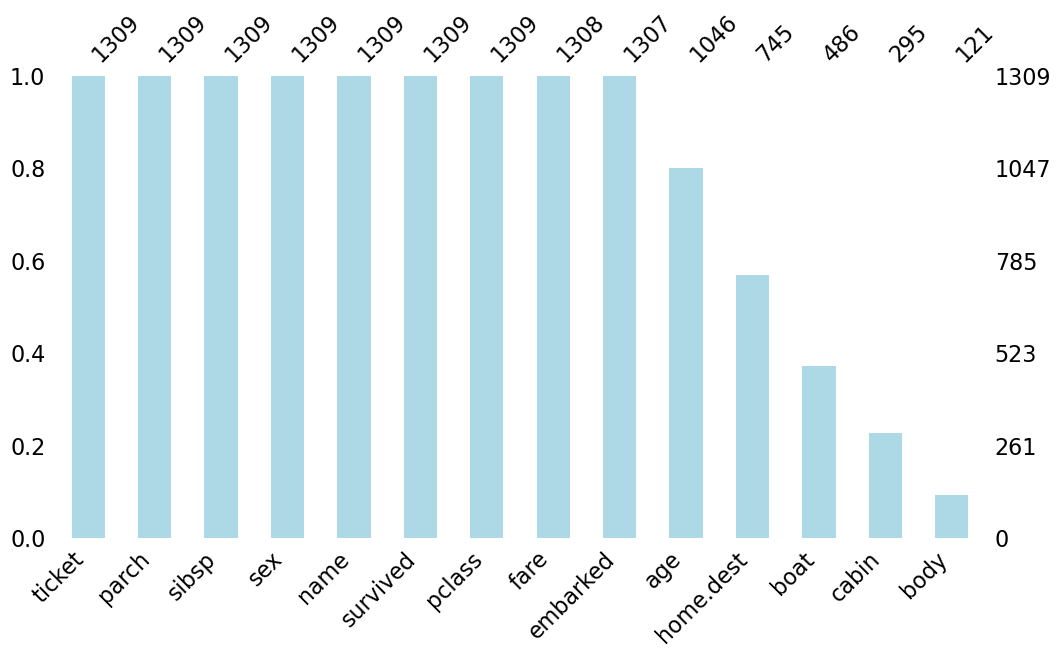

In [9]:
msno.bar(df, color = 'lightblue', sort = 'descending', figsize = (12,6))

In [10]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [11]:
 df.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

Kolumny takie jak age, cabin, boat, body i home.dest mają wysoki procent brakujących danych. Musimy przyjrzeć się temu bliżej, ponieważ usunięcie ich jest niemożliwe, a dodatkowo brakujące wartości mogą zawierać jąkąś informację.

Liczba brakujących wartości w kolumnach fare i embarked to kolejno 1 i 2. Jest
to na tyle mało, że ciężko byłoby wyciągnąć jednoznaczne wnioski, że jest to od czegoś zależne. Dodatkowo usuwając te wiersze nasz zbiór wciąż byłyby wystarczająco duży ***MCAR***

Na pierwszy rzut oka intuicja podpowiada, że brakujące wartości w kolumnie boat są silnie powiązane z faktem czy ktoś ocalał (większość osób która zaginęła nie została ewakuowana ze statku). Kolumna body również zdaje się być z tym powiązana bo identyfikatory ciała zostały przypisane tylko osobom które zginęły i ich ciało zostało odnalezione

# Zadanie 3

Dodatkowo wczytane przez nas kolumny przez występowanie '?' zmieniły swój typ na object, więc zmienie je na takie jakie były podane w opisie danych

In [12]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')
df['body'] = pd.to_numeric(df['body'], errors='coerce')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Teraz zdecydowałam się na stworzenie nowych kolumn, które będą nas informować o brakujących wartościach w danych kolumnach i ułatwią wyciągnięcie dalszych wniosów na temat tego czy jest to od czegoś zależne, w szczególności czy taka osoba przeżyła rejs

In [14]:
df['ageNull'] = np.where(df['age'].isnull(), 1, 0)
df['cabinNull'] = np.where(df['cabin'].isnull(), 1, 0)
df['boatNull'] = np.where(df['boat'].isnull(), 1, 0)
df['bodyNull'] = np.where(df['body'].isnull(), 1, 0)
df['home.destNull'] = np.where(df['home.dest'].isnull(), 1, 0)

## age

In [15]:
df.groupby(['survived'])['ageNull'].mean()

survived
0    0.234858
1    0.146000
Name: ageNull, dtype: float64

In [16]:
df.corr(numeric_only=True)[['ageNull']]

,ageNull
pclass,0.208175
survived,-0.107749
age,NaN
sibsp,-0.007688
parch,-0.082109
fare,-0.130629
body,-0.007328
ageNull,1.000000
cabinNull,0.165508
boatNull,0.113041


Co zadziwiające zmienna ta nie jest mocno związana z przeżyciem. Istnieje korelacja między nią oraz brakującą wartością w miejscu zamieszkania. Nie sądzę jednak, aby w tym przypadku był jakiś mechanizm przyczynowo skutkowy który by to spowodował - jest to po prostu dość szegółowa informacja tak samo jak miejsce zamieszkania ***MAR***

## cabin

In [17]:
df.groupby(['survived'])['cabinNull'].mean()

survived
0    0.873918
1    0.614000
Name: cabinNull, dtype: float64

In [18]:
df.groupby(['pclass'])['cabinNull'].mean()

pclass
1    0.207430
2    0.916968
3    0.977433
Name: cabinNull, dtype: float64

Podejrzewam, że na brakujące wartości w tej kolumnie może mieć wpływ wiele czynników i mogą one mieć związek z tym, czy ktoś był zamożny, jakiej klasy miał bilet, może wgl ktoś nie dostał kabiny. Sam fakt tego czy ktoś przeżył mógł być również z tym powiązany ***MNAR***

## boat

In [19]:
df.groupby(['survived'])['boatNull'].mean()

survived
0    0.988875
1    0.046000
Name: boatNull, dtype: float64

Moim zdaniem mamy tutaj do czynienie z ***MNAR***. Osoby, które nie przeżyły w większości przypadków nie były najpewniej zabrane łódką ratunkową z tonącego statku. Podejrzewam, że dlatego wartość ta nie wynosi 100%, gdyż  mogła zdarzyć, się sytuacja że ktoś wsiadł do łódki w złym stanie/ mógł z niej wypaść..

## body

In [20]:
df.groupby(['survived'])['bodyNull'].mean()

survived
0    0.850433
1    1.000000
Name: bodyNull, dtype: float64

Wcześniej postawione podejrzanie jest prawdziwe dla osób które przeżyły brakujące wartości w kolumnie body są  zamierzone - ***MNAR***

## home.dest

In [21]:
df.groupby(['survived'])['home.destNull'].mean()

survived
0    0.508035
1    0.306000
Name: home.destNull, dtype: float64

In [22]:
df.corr(numeric_only=True)[['home.destNull']]

,home.destNull
pclass,0.577811
survived,-0.198229
age,-0.187382
sibsp,-0.030155
parch,-0.107256
fare,-0.209569
body,0.006620
ageNull,0.345293
cabinNull,0.332690
boatNull,0.205630


Mam tutaj wątpliwości pomiędzy MAR a MNAR. Z jednej strony jest to dość szczegółowa informacja tak samo jak wiek, jednak brak tej informacji jest również skoreolowany z klasą biletu, brakiem wieku oraz brakiem kabiny. Finalnie powiedziałabym, że jest to ***MNAR***

# Zadanie 4

 Tak jak zostało wspomniane wcześniej w przypadku wartości brakujących w kolumnach ***fare*** oraz ***embarked*** usunęłabym te obserwacje.

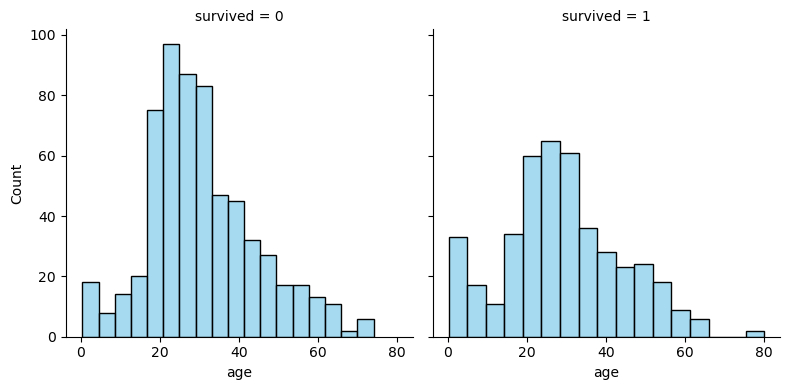

In [23]:
g = sns.FacetGrid(df, col='survived', col_wrap=2, height=4)
g.map(sns.histplot, 'age', color = 'skyblue')

Brakujące wartości dla zmiennej ***age*** uzupełniłabym medianą

W przypadku kolumny ***cabin*** brakuje nam informacji dla prawie 80% przypadków. Zastanowiłabym się czy nie możemy jakoś uprościć tej kolumny pozostawiając tylko na przykład pierwszą literę i poszukała wzorca według którego można by uzupełniać brakujące wartości. Może ma to jakiś związek z ceną biletu.

Dla kolumny ***boat*** stworzyłabym dwie etykiety. Mam podejrzenie, że jeśli ktoś nie przeżył to głównie dlatego, że nie zdążył/brakło dla niego łodzi ratunkowej i wtedy - 'Not applicable', dla osób, które przeżyły - 'Unknown'

***body*** - osoby które nie przeżyły 'Unknown', przeżyły 'Not applicable'. Na pierwszy rzut oka wydaje się, że ta kolumna nie wnosi zbyt wiele, więc rozważyłabym jej usunięcie

***home.dest*** dodałabym wartość 'unknown' albo uzupełniła losowym miejscem z przykładowo 10 najbardziej popularanych